In [1]:
import pandas as pd
import numpy as np

In [2]:
daneKR = pd.read_csv('dane_kredytowe.csv')
daneKR = pd.DataFrame(daneKR)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [5]:
daneKR

,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,miasto,stan_cywilny,zawód,czy_spłaci
0,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,Warszawa,singiel,księgowy,1
1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,Warszawa,singiel,nauczyciel,1
2,46,6119,2,9,0,0,0,0,średnie,działalność,Kraków,singiel,księgowy,0
3,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,Kraków,żonaty,programista,1
4,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,Wrocław,wdowiec,sprzedawca,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,Gdańsk,singiel,księgowy,1
996,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,Poznań,singiel,kierowca,1
997,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,Poznań,rozwiedziony,kierowca,1
998,34,5673,3,4,1,1,1,0,średnie,działalność,Kraków,singiel,księgowy,1


In [6]:
Kolumny = [col for col in daneKR.columns if col != 'miasto'] + ['miasto']

In [7]:
daneKR = daneKR[Kolumny]
daneKR

,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,czy_spłaci,miasto
0,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,1,Warszawa
1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,1,Warszawa
2,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,0,Kraków
3,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,1,Kraków
4,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,1,Wrocław
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,1,Gdańsk
996,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,1,Poznań
997,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,1,Poznań
998,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,1,Kraków


In [8]:
Kolumny = ['czy_spłaci'] + [col for col in daneKR.columns if col != 'czy_spłaci']
Kolumny

['czy_spłaci',
 'wiek',
 'dochód',
 'liczba_dzieci',
 'lata_w_pracy',
 'ma_kartę',
 'ma_konto',
 'miał_kredyt',
 'spóźnienia',
 'wykształcenie',
 'status_zawodowy',
 'stan_cywilny',
 'zawód',
 'miasto']

In [9]:
daneKR = daneKR[Kolumny]
daneKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
0,1,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,Warszawa
1,1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,Warszawa
2,0,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,Kraków
3,1,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,Kraków
4,1,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,Wrocław
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,Gdańsk
996,1,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,Poznań
997,1,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,Poznań
998,1,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,Kraków


<Axes: >

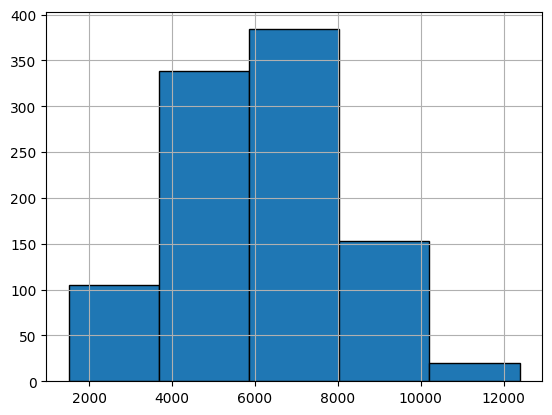

In [10]:
daneKR['dochód'].hist(bins=5, edgecolor = 'black')

<Axes: >

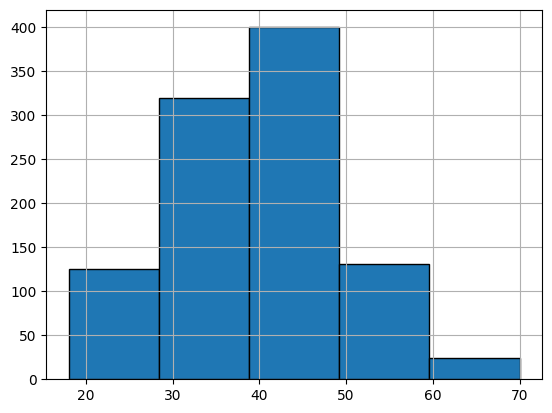

In [11]:
daneKR['wiek'].hist(bins=5, edgecolor = 'black')

<Axes: ylabel='dochód'>

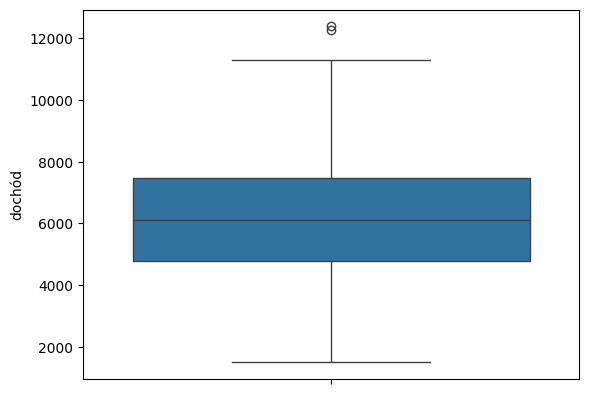

In [12]:
sns.boxplot(data = daneKR, y = 'dochód')
#Oglądam boxplot dla zarobków, aby wykryć skrajności; Mamy tutaj dwie skrajności

In [13]:
daneKR[daneKR['dochód'] > 12000]

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
615,1,41,12386,1,11,0,1,1,0,średnie,umowa o pracę,singiel,sprzedawca,Poznań
957,1,44,12275,2,11,1,1,1,0,średnie,umowa zlecenie,żonaty,programista,Poznań


In [14]:
dKR = daneKR[daneKR['dochód'] < 12000] #Usunąłem obserwacje, gdzie dochód wykraczał powyżej 12000 (były to 2 obserwacje, są zapisane do zmiennej biggestIncome)
biggestIncome = daneKR[daneKR['dochód'] > 12000]

In [15]:
dKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
0,1,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,Warszawa
1,1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,Warszawa
2,0,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,Kraków
3,1,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,Kraków
4,1,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,Wrocław
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,Gdańsk
996,1,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,Poznań
997,1,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,Poznań
998,1,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,Kraków


<Axes: ylabel='wiek'>

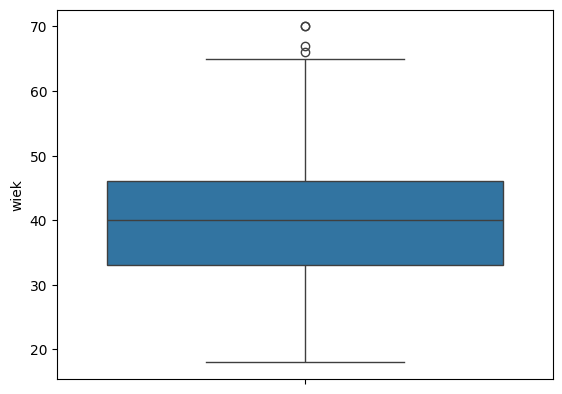

In [16]:
sns.boxplot(data = dKR, y='wiek')

In [17]:
dKR.nlargest(3, 'wiek')

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
209,1,70,9499,1,8,1,1,0,0,wyższe,działalność,wdowiec,lekarz,Kraków
478,0,70,4225,0,8,0,1,1,1,średnie,umowa o pracę,singiel,księgowy,Warszawa
179,0,67,3792,3,5,0,1,0,0,średnie,umowa o pracę,singiel,nauczyciel,Poznań


In [18]:
theOldest = daneKR[daneKR['wiek'] >= 67]
theOldest

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
179,0,67,3792,3,5,0,1,0,0,średnie,umowa o pracę,singiel,nauczyciel,Poznań
209,1,70,9499,1,8,1,1,0,0,wyższe,działalność,wdowiec,lekarz,Kraków
478,0,70,4225,0,8,0,1,1,1,średnie,umowa o pracę,singiel,księgowy,Warszawa


In [19]:
dKR = dKR[dKR['wiek'] <= 67] #Usunąłem obserwacje, gdzie wiek wykraczał powyżej 67 (były to 3 obserwacje, są zapisane w zmiennej theOldest)
dKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto
0,1,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,Warszawa
1,1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,Warszawa
2,0,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,Kraków
3,1,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,Kraków
4,1,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,Wrocław
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,Gdańsk
996,1,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,Poznań
997,1,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,Poznań
998,1,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,Kraków


In [20]:
dKR['wykształcenie'].unique()

array(['wyższe', 'podstawowe', 'średnie'], dtype=object)

In [21]:
Puste = dKR.isna().sum()

In [22]:
Puste #W tych danych nie ma wartości pustych

,0
czy_spłaci,0
wiek,0
dochód,0
liczba_dzieci,0
lata_w_pracy,0
ma_kartę,0
ma_konto,0
miał_kredyt,0
spóźnienia,0
wykształcenie,0


In [23]:
dKR['wykształcenie_liczbowo'] = dKR['wykształcenie'].apply(lambda x: 0 if x == 'podstawowe' else 1 if x == 'średnie' else 2)

/tmp/ipython-input-23-3485961026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dKR['wykształcenie_liczbowo'] = dKR['wykształcenie'].apply(lambda x: 0 if x == 'podstawowe' else 1 if x == 'średnie' else 2)


In [24]:
dKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto,wykształcenie_liczbowo
0,1,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,Warszawa,2
1,1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,Warszawa,0
2,0,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,Kraków,1
3,1,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,Kraków,2
4,1,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,Wrocław,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,Gdańsk,1
996,1,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,Poznań,0
997,1,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,Poznań,1
998,1,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,Kraków,1


In [25]:
dKR['status_zawodowy'].unique()

array(['kadra zarządzająca', 'umowa o pracę', 'działalność',
       'umowa zlecenie', 'bezrobotny'], dtype=object)

In [26]:
dKR['stat_zaw_liczbowo'] = dKR['status_zawodowy'].apply(lambda x: 0 if 'bezrobotny' else 1 if 'umowa zlecenie' else 2 if 'umowa o pracę' else 3 if 'działalność' else 4)

/tmp/ipython-input-26-2618814877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dKR['stat_zaw_liczbowo'] = dKR['status_zawodowy'].apply(lambda x: 0 if 'bezrobotny' else 1 if 'umowa zlecenie' else 2 if 'umowa o pracę' else 3 if 'działalność' else 4)


In [27]:
dKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,status_zawodowy,stan_cywilny,zawód,miasto,wykształcenie_liczbowo,stat_zaw_liczbowo
0,1,44,8798,1,10,1,1,0,0,wyższe,kadra zarządzająca,singiel,księgowy,Warszawa,2,0
1,1,38,7849,1,8,1,1,1,0,podstawowe,umowa o pracę,singiel,nauczyciel,Warszawa,0,0
2,0,46,6119,2,9,0,0,0,0,średnie,działalność,singiel,księgowy,Kraków,1,0
3,1,55,4706,2,13,1,1,1,0,wyższe,umowa o pracę,żonaty,programista,Kraków,2,0
4,1,37,7396,0,10,0,1,0,0,wyższe,umowa o pracę,wdowiec,sprzedawca,Wrocław,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,umowa o pracę,singiel,księgowy,Gdańsk,1,0
996,1,57,5946,1,10,0,1,1,0,podstawowe,bezrobotny,singiel,kierowca,Poznań,0,0
997,1,46,4236,0,9,1,0,1,0,średnie,umowa zlecenie,rozwiedziony,kierowca,Poznań,1,0
998,1,34,5673,3,4,1,1,1,0,średnie,działalność,singiel,księgowy,Kraków,1,0


In [28]:
print(dKR.columns.get_loc("stan_cywilny"))
print(dKR.columns.get_loc("miasto"))

11
13


In [29]:
dKR = pd.get_dummies(dKR, columns=["miasto", "zawód", "stan_cywilny"])
dKR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie,...,zawód_kierowca,zawód_księgowy,zawód_lekarz,zawód_nauczyciel,zawód_programista,zawód_sprzedawca,stan_cywilny_rozwiedziony,stan_cywilny_singiel,stan_cywilny_wdowiec,stan_cywilny_żonaty
0,1,44,8798,1,10,1,1,0,0,wyższe,...,False,True,False,False,False,False,False,True,False,False
1,1,38,7849,1,8,1,1,1,0,podstawowe,...,False,False,False,True,False,False,False,True,False,False
2,0,46,6119,2,9,0,0,0,0,średnie,...,False,True,False,False,False,False,False,True,False,False
3,1,55,4706,2,13,1,1,1,0,wyższe,...,False,False,False,False,True,False,False,False,False,True
4,1,37,7396,0,10,0,1,0,0,wyższe,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,średnie,...,False,True,False,False,False,False,False,True,False,False
996,1,57,5946,1,10,0,1,1,0,podstawowe,...,True,False,False,False,False,False,False,True,False,False
997,1,46,4236,0,9,1,0,1,0,średnie,...,True,False,False,False,False,False,True,False,False,False
998,1,34,5673,3,4,1,1,1,0,średnie,...,False,True,False,False,False,False,False,True,False,False


In [30]:
dKR_LR = dKR.drop(["wykształcenie", "status_zawodowy"], axis = 1)

In [31]:
dKR_LR

,czy_spłaci,wiek,dochód,liczba_dzieci,lata_w_pracy,ma_kartę,ma_konto,miał_kredyt,spóźnienia,wykształcenie_liczbowo,...,zawód_kierowca,zawód_księgowy,zawód_lekarz,zawód_nauczyciel,zawód_programista,zawód_sprzedawca,stan_cywilny_rozwiedziony,stan_cywilny_singiel,stan_cywilny_wdowiec,stan_cywilny_żonaty
0,1,44,8798,1,10,1,1,0,0,2,...,False,True,False,False,False,False,False,True,False,False
1,1,38,7849,1,8,1,1,1,0,0,...,False,False,False,True,False,False,False,True,False,False
2,0,46,6119,2,9,0,0,0,0,1,...,False,True,False,False,False,False,False,True,False,False
3,1,55,4706,2,13,1,1,1,0,2,...,False,False,False,False,True,False,False,False,False,True
4,1,37,7396,0,10,0,1,0,0,2,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,37,8140,0,5,0,1,1,0,1,...,False,True,False,False,False,False,False,True,False,False
996,1,57,5946,1,10,0,1,1,0,0,...,True,False,False,False,False,False,False,True,False,False
997,1,46,4236,0,9,1,0,1,0,1,...,True,False,False,False,False,False,True,False,False,False
998,1,34,5673,3,4,1,1,1,0,1,...,False,True,False,False,False,False,False,True,False,False


In [32]:
X = dKR_LR.drop("czy_spłaci", axis=1)

In [33]:
y = dKR_LR["czy_spłaci"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
predictions = model.predict(X_test)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82       114
           1       0.87      0.94      0.90       185

    accuracy                           0.87       299
   macro avg       0.88      0.85      0.86       299
weighted avg       0.87      0.87      0.87       299



In [52]:
confusion_matrix(y_test, predictions)

array([[ 87,  27],
       [ 11, 174]])

In [55]:
model.coef_

array([[-5.07601295e-02,  4.57197483e-04, -1.78716026e-01,
        -2.37071373e-02,  1.84076242e+00,  7.73204200e-01,
         1.32037655e+00, -4.45863302e+00, -4.75112527e-01,
         0.00000000e+00, -2.05677757e-01, -1.66494571e-01,
         1.73418629e-01,  7.55057732e-03, -3.58950007e-01,
        -2.98244565e-01, -5.56353345e-02, -3.58174291e-02,
        -1.91074861e-01, -3.69812886e-01,  4.00431946e-01,
         1.52631905e-01, -3.61814009e-01, -3.21947869e-01,
        -1.90231568e-02]])

In [66]:
wspolczynniki = pd.DataFrame({
    'cecha': X_train.columns.tolist() + ['Intercept'],
    'współczynniki': np.append(model.coef_[0], model.intercept_[0])
})
wspolczynniki.sort_values(by='współczynniki', ascending=False)

,cecha,współczynniki
4,ma_kartę,1.840762
6,miał_kredyt,1.320377
5,ma_konto,0.773204
20,zawód_sprzedawca,0.400432
12,miasto_Poznań,0.173419
21,stan_cywilny_rozwiedziony,0.152632
13,miasto_Warszawa,0.007551
1,dochód,0.000457
9,stat_zaw_liczbowo,0.000000
24,stan_cywilny_żonaty,-0.019023
